# Introduction to Data Science 2021

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="background-color: #ccfff2"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in Moodle.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) from Kaggle, and complete the following exercises. You will need to create a Kaggle account unless you already have one, but it is very straightforward. 

The dataset consists of personal information of all the passengers on board the Titanic, along with the information whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data. 

    <span style="background-color: #ccfff2"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="background-color: #ccfff2"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [2]:
import pandas as pd

titanic = pd.read_csv(r'./train.csv', sep=',')
titanic.shape

(891, 12)

2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="background-color: #ccfff2"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="background-color: #ccfff2"> *Hint: The shape of the data should now be (891, 10).*</span>

In [3]:
del titanic['Name']
del titanic['Ticket']
titanic.shape

(891, 10)

3. The column <span style="background-color: #ccfff2">*Cabin*</span> contains a letter and a number. A clever data scientist might conclude that the letter stands for their deck level on the ship (which is indeed true) and that keeping just the deck information might improve the results of a classifier predicting an output variable. Add a new column to the dataset, which consists simply of the deck letter. 

    <span style="background-color: #ccfff2">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [4]:
titanic['Deck'] = titanic['Cabin'].apply(lambda x: ''.join(filter(str.isalpha, x)) if isinstance(x,str) else None)
titanic.shape

(891, 11)

4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). Their string representation is not efficient for further computation. First create two lists, one with the continuous variables and one with the categorical ones. Then, transform the categorical values into their numeric representation, so that a unique integer id corresponds to each distinct category. 

    <span style="background-color: #ccfff2">*Hint 1: Pandas can do this for you.*</span> 

    <span style="background-color: #ccfff2">*Hint 2: Look into label encoding.*</span>

In [5]:
import numpy as np

# two lists (first with numerical values, second with categorical values)
cont_cols = ['Age', 'Fare']
cat_cols = ['Sex', 'Cabin', 'Embarked', 'Deck'] # only these one because the other categorical variables are numbers
# transform categorical values into their numeric representation

titanic[cat_cols] = titanic[cat_cols].astype('category').apply(lambda x: x.cat.codes.replace(-1, np.nan))

titanic.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,1,0,3,1,22.0,1,0,7.2500,NaN,2.0,NaN
1,2,1,1,0,38.0,1,0,71.2833,81.0,0.0,5.0
2,3,1,3,0,26.0,0,0,7.9250,NaN,2.0,NaN
3,4,1,1,0,35.0,1,0,53.1000,55.0,2.0,5.0
4,5,0,3,1,35.0,0,0,8.0500,NaN,2.0,NaN


5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during the preprocessing:

    a) For continuous values, replace the missing values with the average of the non-missing values of that column.

    b) For discrete and categorical values, replace the missing values with the mode of the column.

    <span style="background-color: #ccfff2">*Remember: In the previous step we converted categorical values into numeric representations. You can use the lists we created in step 4, to see which variables are discrete (even though we are using their numeric representation).*</span>

In [6]:
for t in cont_cols:
    titanic[t] = titanic[t].fillna(titanic[t].mean())

for t in cat_cols:
    titanic[t] = titanic[t].fillna(titanic[t].mode()[0])
    
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Deck
0,1,0,3,1,22.0,1,0,7.2500,47.0,2.0,5.0
1,2,1,1,0,38.0,1,0,71.2833,81.0,0.0,5.0
2,3,1,3,0,26.0,0,0,7.9250,47.0,2.0,5.0
3,4,1,1,0,35.0,1,0,53.1000,55.0,2.0,5.0
4,5,0,3,1,35.0,0,0,8.0500,47.0,2.0,5.0


6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="background-color: #ccfff2"> .csv</span> file. Then, write another file, this time in <span style="background-color: #ccfff2">JSON</span> format, with the following structure:

In [6]:
#[
#    {
#        "Deck": 0,
#        "Age": 20,
#        "Survived", 0
#        ...
#    },
#    {
#        ...
#    }
#]

In [7]:
# save to csv
titanic.to_csv(path_or_buf='./modified_titanic.csv', index=False)

# save to json
titanic.to_json(path_or_buf='./modified_titanic.json', orient='records',indent=1)

Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have preprocessed it a bit, it’s time to do some exploratory data analysis.

1. First consider each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [53]:
from collections import defaultdict
# adding the other categorical variables to cat_cols array
cat_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Deck']


modes = titanic.loc[:,cat_cols].mode(axis=0)

medians = pd.DataFrame(titanic.loc[:,cont_cols].median(axis=0)).T

display(modes, medians)

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Deck
0,0,3,1,0,0,47.0,2.0,5.0


,Age,Fare
0,29.699118,14.4542


2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”. 

    <span style="background-color: #ccfff2">*Hint: What are the average/most frequent variable values for a non-survivor?*</span>

In [68]:
survivors = titanic[titanic['Survived'] == 1]
non_survivors = titanic[titanic['Survived'] == 0]

modes_s = survivors.loc[:,cat_cols].mode(axis=0)
medians_s = pd.DataFrame(survivors.loc[:,cont_cols].median(axis=0)).T

modes_ns = non_survivors.loc[:,cat_cols].mode(axis=0)
medians_ns = pd.DataFrame(non_survivors.loc[:,cont_cols].median(axis=0)).T

display(modes_s, medians_s, modes_ns, medians_ns)


,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Deck
0,1,1,0,0,0,47.0,2.0,5.0


,Age,Fare
0,29.699118,26.0


,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Deck
0,0,3,1,0,0,47.0,2.0,5.0


,Age,Fare
0,29.699118,10.5


3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group? 

    <span style="background-color: #ccfff2">*Note: You are free to choose your methods: non-graphical/graphical, static/interactive - anything goes.*</span>

In [10]:
# Use this cell for your code

4. To give a more complete picture of the two groups (survivor/non-survivor), provide graphical displays of the distribution of the variables in each group whenever appropriate (not, e.g., on the ticket number).

In [11]:
# Use this cell for your code

5. Next, let's start the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to display the survival status.

    <span style="background-color: #ccfff2">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="background-color: #ccfff2">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

In [12]:
# Use this cell for your code

6. Finally, recall the preprocessing we did in the first exercise. Can you say something about the effect of the choices that were made, in particular, to use the mode or the mean to impute missing values, instead of, for example, ignoring passengers with missing data?

*Use this (markdown) cell for your written answer*

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise last week. Find your self-made <span style="background-color: #ccfff2">pos.txt</span> and <span style="background-color: #ccfff2">neg.txt</span>, or if you didn’t complete the exercise, you can find the example solutions on Moodle after Tuesday.

1. Find the most common words in each file (positive and negative). What are they? Are some of them clearly general terms relating to the nature of the data, and not just the emotion?

In [100]:
import pandas as pd
from collections import Counter

with open('pos.txt') as f:
    positive = f.readlines()
    #pos_words = Counter(word for line in f for word in line.split())

with open('neg.txt') as f:
    negative = f.readlines()
    #neg_words = Counter(word for line in f for word in line.split())

pos_words = Counter(word for line in positive for word in line.split())
neg_words = Counter(word for line in negative for word in line.split())

display(pos_words.most_common(10), neg_words.most_common(10))
# most of them are clearly general terms

[('use', 14625),
 ('car', 8028),
 ('work', 7550),
 ('one', 6594),
 ('veri', 5586),
 ('product', 5565),
 ('great', 5323),
 ('well', 5067),
 ('good', 4974),
 ('up', 4855)]

[('use', 891),
 ('one', 594),
 ('product', 592),
 ('work', 561),
 ('car', 503),
 ('out', 425),
 ('up', 382),
 ('veri', 365),
 ('good', 351),
 ('light', 329)]

2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the text files, and make them into a <span style="background-color: #ccfff2">2 x m</span> matrix, where <span style="background-color: #ccfff2">m</span> is the number of unique words in the data. The problem with using the most common words in a review to analyze its contents is that words that are common overall will be common in all reviews. This means that they probably don’t tell anything about a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (here the reviews are the documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in other reviews as well (inverse document frequency). You can use any variant of the formula, and ready-made implementations. <span style="background-color: #ccfff2">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True)
pos_tfidf = pd.DataFrame(vectorizer.fit_transform(positive)[0].T.todense(), index=vectorizer.get_feature_names(), columns=['TF-IDF'])
pos_tfidf = pos_tfidf.sort_values('TF-IDF', ascending=False)

neg_tfidf = pd.DataFrame(vectorizer.fit_transform(negative)[0].T.todense(), index=vectorizer.get_feature_names(), columns=['TF-IDF'])
neg_tfidf = neg_tfidf.sort_values('TF-IDF', ascending=False)

display(pos_tfidf.head(5), neg_tfidf.head(5))


,TF-IDF
bumper,0.302962
therewhat,0.286876
12great,0.286876
front,0.251441
jumper,0.193255


,TF-IDF
detal,0.493883
vikingcobra,0.493883
again,0.458309
microfib,0.296126
stick,0.286279


3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [104]:
display(pos_words.most_common(15), neg_words.most_common(15))
display(pos_tfidf.head(15), neg_tfidf.head(15))

"""
Yes, they are totally different words. Furthermore, the words with the highest
TF/IDF are not general terms, but pretty specific ones.
"""

[('use', 14625),
 ('car', 8028),
 ('work', 7550),
 ('one', 6594),
 ('veri', 5586),
 ('product', 5565),
 ('great', 5323),
 ('well', 5067),
 ('good', 4974),
 ('up', 4855),
 ('out', 4669),
 ('time', 3975),
 ('need', 3969),
 ('more', 3837),
 ('look', 3779)]

[('use', 891),
 ('one', 594),
 ('product', 592),
 ('work', 561),
 ('car', 503),
 ('out', 425),
 ('up', 382),
 ('veri', 365),
 ('good', 351),
 ('light', 329),
 ('time', 321),
 ('more', 299),
 ('tri', 298),
 ('dont', 279),
 ('blade', 268)]

,TF-IDF
bumper,0.302962
therewhat,0.286876
12great,0.286876
front,0.251441
jumper,0.193255
besid,0.188429
ideal,0.185083
realli,0.178458
16,0.169641
feet,0.166603


,TF-IDF
detal,0.493883
vikingcobra,0.493883
again,0.458309
microfib,0.296126
stick,0.286279
towel,0.273780
buy,0.183586
product,0.154290
polici,0.000000
polish,0.000000


'\nYes, they are totally different words. Furthermore, the words with the highest\nTF/IDF are not general terms, but pretty specific ones.\n'

4. Plot the words in each class and their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset. 

    <span style="background-color: #ccfff2">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

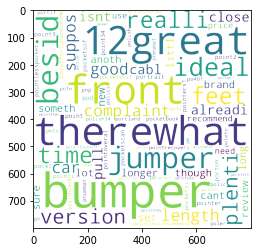

In [120]:
import wordcloud as wc
import matplotlib.pyplot as plt

#toplot_neg = pass

cloud_pos = wc.WordCloud(width = 800, height = 800,
                background_color = 'rgba(255, 255, 255, 0)',
                mode='RGBA',
                min_font_size = 10).generate(' '.join(pos_tfidf.head(100).index))

cloud_neg = wc.WordCloud(width = 800, height = 800,
                background_color = 'rgba(255, 255, 255, 0)',
                mode='RGBA',
                min_font_size = 10).generate(' '.join(neg_tfidf.head(100).index))

#plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(cloud_pos)
plt.axis("off")
plt.show()

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose fixes to improve them.

1. Find at least three statistical visualizations that you think aren’t very good, and identify their problems. Copying examples from various junk chart websites isn’t accepted – you should find your own junk charts. You should be able to find good (or rather, bad) examples quite easily since a large fraction of charts have at least some issues. The examples you choose should also have different problems, so don’t look for three column or bar charts whose axes don’t begin at zero. Try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.



**Submit a PDF with all the charts (the ones you found and the ones you produced).**